# Building Logistic Regression Model for predicting Probability of Default (PD)

For further analytics, preprocessed datasests are saved as separate files, and from this step on, it is not required to run the whole project from scartch, but can go on with uploading the datasets that have been saved in the previous step. 



In [2]:
#import relevant libraries
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

part_1 = pd.read_csv('train_inputs_part_1.csv')
part_2 = pd.read_csv('train_inputs_part_2.csv')
part_3 = pd.read_csv('train_inputs_part_3.csv')
part_4 = pd.read_csv('train_inputs_part_4.csv')

train_inputs = pd.concat([part_1, part_2, part_3, part_4])

pd.options.display.max_rows = 50
pd.options.display.max_columns = None

train_targets = pd.read_csv('train_targets.csv')





In [3]:
shape = [train_inputs.shape, 
         train_targets.shape]
shape

[(347181, 301), (347181, 2)]

# Logistic Regression intuition 

In [4]:
# Based on the initial point of generating dummy variables, we know that the first dummy variable is grade_A
# The following code returns the column number of the first dummy variable in the train_inputs dataframe 

baseline_dummy = train_inputs.columns.get_loc("grade_A")

# This code returns the last column number
last_dummy = train_inputs.shape[1]-1



In [5]:
train_inputs

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_date,days_passed,month_passed,term_36,term_60,issue_d_date,months_issue_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verif_status_Not Verified,verif_status_Source Verified,verif_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,home_own_none_other_any_combined,st_group_TX,st_group_FL,st_group_NY,st_group_CA,st_group_NM_MD_NC_LA_MD,st_group_MI_NJ_VA,st_group_OK_TN_AZ_DE_AR_UT,st_group_KY_MN_NA_IN_OH,st_group_RI_OR_GA_WA,st_group_SD_ID,st_group_MS_MT,st_group_IL_CT_CO,st_group_VT_SC,st_group_KS,term:36,term:60,months_factor,months_since_issued:106,months_since_issued:115,months_since_issued:124,months_since_issued:133,months_since_issued:142,months_since_issued:151,months_since_issued:160,months_since_issued:169,months_since_issued:178,months_since_issued:187,int_rate_classes,"int_rate_classes_(5.399, 7.484]","int_rate_classes_(7.484, 9.548]","int_rate_classes_(9.548, 11.612]","int_rate_classes_(11.612, 13.676]","int_rate_classes_(13.676, 15.74]","int_rate_classes_(15.74, 17.804]","int_rate_classes_(17.804, 19.868]","int_rate_classes_(19.868, 21.932]","int_rate_classes_(21.932, 23.996]","int_rate_classes_(23.996, 26.06

In [6]:
'''This code assigns a list of column names to the variable column_names, using the tolist() method to 
convert the Index object returned by the columns attribute to a list'''
dummy_vars = ["'" + name + "'," for name in train_inputs.iloc[:,baseline_dummy:last_dummy].columns]

# The output of the dummy_vars needs to have list of the column names starting from 'grade_A' all the way to funded_amount_(32970.588, 33985.294]
dummy_vars
len(dummy_vars)

#
with open('column-names.txt', 'w') as f:
    for name in dummy_vars:
        f.write(name + '\n')






In [7]:
dummy_vars

["'grade_A',",
 "'grade_B',",
 "'grade_C',",
 "'grade_D',",
 "'grade_E',",
 "'grade_F',",
 "'grade_G',",
 "'sub_grade_A1',",
 "'sub_grade_A2',",
 "'sub_grade_A3',",
 "'sub_grade_A4',",
 "'sub_grade_A5',",
 "'sub_grade_B1',",
 "'sub_grade_B2',",
 "'sub_grade_B3',",
 "'sub_grade_B4',",
 "'sub_grade_B5',",
 "'sub_grade_C1',",
 "'sub_grade_C2',",
 "'sub_grade_C3',",
 "'sub_grade_C4',",
 "'sub_grade_C5',",
 "'sub_grade_D1',",
 "'sub_grade_D2',",
 "'sub_grade_D3',",
 "'sub_grade_D4',",
 "'sub_grade_D5',",
 "'sub_grade_E1',",
 "'sub_grade_E2',",
 "'sub_grade_E3',",
 "'sub_grade_E4',",
 "'sub_grade_E5',",
 "'sub_grade_F1',",
 "'sub_grade_F2',",
 "'sub_grade_F3',",
 "'sub_grade_F4',",
 "'sub_grade_F5',",
 "'sub_grade_G1',",
 "'sub_grade_G2',",
 "'sub_grade_G3',",
 "'sub_grade_G4',",
 "'sub_grade_G5',",
 "'home_ownership_ANY',",
 "'home_ownership_MORTGAGE',",
 "'home_ownership_NONE',",
 "'home_ownership_OTHER',",
 "'home_ownership_OWN',",
 "'home_ownership_RENT',",
 "'verif_status_Not Verified',

## Dummy Variable Trap

The dummy variable trap is a common issue that can occur when creating dummy variables in regression analysis, where one or more of the dummy variables can be expressed as a linear combination of the others. This results in a perfect multicollinearity between the variables, which can lead to issues in interpreting the results of the regression analysis.
Consider the example of education level with three categories: "No Higher Education," "College Graduated," and "Earned Graduate Master or More."

To create dummy variables for these categories, we would typically create two binary variables: one for "College Graduated" and one for "Earned Graduate Master or More." However, this creates the potential for the dummy variable trap, as "No Higher Education" can be derived as 1 minus the sum of the other two variables.

To avoid the dummy variable trap, we would need to include all three dummy variables in the regression model, but leave one of them out as the reference category. For example, we could leave out the "No Higher Education" category and include two dummy variables: one for "College Graduated" and one for "Earned Graduate Master or More."

The interpretation of the coefficients for these variables would then be as follows:

The coefficient for "College Graduated" would represent the effect of having a college degree compared to having no higher education, holding constant the effect of having a graduate degree.
The coefficient for "Earned Graduate Master or More" would represent the effect of having a graduate degree compared to having no higher education, holding constant the effect of having a college degree.
The omitted category, "No Higher Education," would be the reference category, and the coefficients for the other two categories would be interpreted relative to this category.
By including all three dummy variables, we avoid the dummy variable trap and can obtain separate estimates of the effects of each category.

In [8]:
"""This step returns dummies_ref_categ dataframe with only dummy variables, and removes one variable from each class as a 
reference category to avoid dummy variable trap as discussed above"""

train_dummies = train_inputs.loc[:, ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'home_ownership_ANY',
'home_ownership_MORTGAGE',
'home_ownership_NONE',
'home_ownership_OWN',
'home_ownership_RENT',
'verif_status_Not Verified',
'verif_status_Source Verified',
'purpose_car',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_educational',
'purpose_home_improvement',
'purpose_house',
'purpose_major_purchase',
'purpose_medical',
'purpose_moving',
'purpose_renewable_energy',
'purpose_small_business',
'purpose_vacation',
'purpose_wedding',
'initial_list_status_w',
'st_group_TX',
'st_group_FL',
'st_group_NY',
'st_group_CA',
'st_group_NM_MD_NC_LA_MD',
'st_group_MI_NJ_VA',
'st_group_KY_MN_NA_IN_OH',
'st_group_RI_OR_GA_WA',
'st_group_SD_ID',
'st_group_MS_MT',
'st_group_IL_CT_CO',
'st_group_VT_SC',
'st_group_KS',
'term:36',
'months_since_issued:115',
'months_since_issued:124',
'months_since_issued:133',
'months_since_issued:142',
'months_since_issued:151',
'months_since_issued:160',
'months_since_issued:169',
'months_since_issued:178',
'months_since_issued:187',
'int_rate_classes_(5.399, 7.484]',
'int_rate_classes_(7.484, 9.548]',
'int_rate_classes_(9.548, 11.612]',
'int_rate_classes_(11.612, 13.676]',
'int_rate_classes_(13.676, 15.74]',
'int_rate_classes_(15.74, 17.804]',
'int_rate_classes_(17.804, 19.868]',
'int_rate_classes_(19.868, 21.932]',
'int_rate_classes_(21.932, 23.996]',
'income_<0k',
'income_0k-10k',
'income_10k-20k',
'income_20k-30k',
'income_30k-40k',
'income_40k-50k',
'income_50k-60k',
'income_60k-70k',
'income_70k-80k',
'income_80k-90k',
'income_90k-100k',
'income_100k-110k',
'income_110k-120k',
'funded_amount_(465.5, 1514.706]',
'funded_amount_(1514.706, 2529.412]',
'funded_amount_(2529.412, 3544.118]',
'funded_amount_(3544.118, 4558.824]',
'funded_amount_(4558.824, 5573.529]',
'funded_amount_(5573.529, 6588.235]',
'funded_amount_(6588.235, 7602.941]',
'funded_amount_(7602.941, 8617.647]',
'funded_amount_(8617.647, 9632.353]',
'funded_amount_(9632.353, 10647.059]',
'funded_amount_(10647.059, 11661.765]',
'funded_amount_(11661.765, 12676.471]',
'funded_amount_(12676.471, 13691.176]',
'funded_amount_(13691.176, 14705.882]',
'funded_amount_(14705.882, 15720.588]',
'funded_amount_(15720.588, 16735.294]',
'funded_amount_(16735.294, 17750.0]',
'funded_amount_(17750.0, 18764.706]',
'funded_amount_(18764.706, 19779.412]',
'funded_amount_(19779.412, 20794.118]',
'funded_amount_(20794.118, 21808.824]',
'funded_amount_(21808.824, 22823.529]',
'funded_amount_(22823.529, 23838.235]',
'funded_amount_(23838.235, 24852.941]',
'funded_amount_(24852.941, 25867.647]',
'funded_amount_(25867.647, 26882.353]',
'funded_amount_(26882.353, 27897.059]',
'funded_amount_(27897.059, 28911.765]',
'funded_amount_(28911.765, 29926.471]',
'funded_amount_(29926.471, 30941.176]',
'funded_amount_(30941.176, 31955.882]',
'funded_amount_(31955.882, 32970.588]',
'funded_amount_(32970.588, 33985.294]',
]]

In [9]:
train_dummies.shape

(347181, 105)

In [10]:
ref_categories = ['grade_G',
                  'verif_status_Verified',
                  'purpose_other',
                  'home_own_none_other_any_combined',
                  'initial_list_status_f',
                  'st_group_OK_TN_AZ_DE_AR_UT',
                  'term:60',
                  'months_since_issued:106',
                  'int_rate_classes_(23.996, 26.06]',
                  'income_120k-130k',
                  'funded_amount_(33985.294, 35000.0]'
                  ]

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
reg1 = LogisticRegression()
pd.options.display.max_rows = 10



In [13]:
train_targets

,Unnamed: 0,payment_quality
0,89831,0
1,160566,1
2,43087,1
3,121576,1
4,52758,1
...,...,...
347176,104874,1
347177,75689,0
347178,132949,0
347179,147970,1


In [14]:
reg1.fit(train_dummies,train_targets['payment_quality'])

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
reg1.intercept_

array([1.45207366])

In [16]:
reg1.coef_

array([[ 0.34739504,  0.37916965,  0.22779548,  0.1457517 ,  0.11907034,
         0.08247336,  0.        ,  0.17249424,  0.14340003,  0.15339562,
         0.06410859,  0.05286606, -0.02340092,  0.18286071,  0.15382494,
         0.04484045, -0.14276733,  0.02947456,  0.03933473,  0.12230647,
        -0.09855266, -0.11628436, -0.15191934, -0.4071216 ,  0.03666586,
         0.34020196,  0.03586772,  0.09639983, -0.12831708, -0.06046938,
        -0.04785322, -0.03693888, -0.05914283, -0.01736528,  0.07375557,
         0.08380767,  0.20659902,  0.12252416,  0.21970963,  0.21512773,
        -0.05223481, -0.34312626, -0.62275724, -0.86706419, -0.91011628,
        -0.77402737, -0.60324007, -0.43658964, -0.54122067, -0.01020635,
         2.24639601,  1.67588019,  1.23115807,  0.99913318,  0.82375417,
         0.60572674,  0.43927111,  0.31156989,  0.13649389,  0.        ,
        -0.83721401, -0.93642188, -0.84684629, -0.77178855, -0.6186958 ,
        -0.5407826 , -0.40884724, -0.33411236, -0.2

In [17]:
var_names = train_dummies.columns.values
reg_table = pd.DataFrame(columns = ['Feature name'], data=var_names)
reg_table['Coefficients'] = np.transpose(reg1.coef_)
reg_table.index = reg_table.index + 1
reg_table.loc[0] = ["Intercept", reg1.intercept_[0]]
reg_table = reg_table.sort_index()
reg_table

,Feature name,Coefficients
0,Intercept,1.452074
1,grade_A,0.347395
2,grade_B,0.379170
3,grade_C,0.227795
4,grade_D,0.145752
...,...,...
101,"funded_amount_(28911.765, 29926.471]",-0.027767
102,"funded_amount_(29926.471, 30941.176]",0.045312
103,"funded_amount_(30941.176, 31955.882]",-0.028734
104,"funded_amount_(31955.882, 32970.588]",0.124958


In [18]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_p_values:

    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self, X, y):
        self.model.fit(X,y)
        denominator = (2.0* (1.0 + np.cosh(self.model.decision_function(X))))
        denominator = np.tile(denominator, (X.shape[1],1)).T
        F_ij = np.dot((X / denominator).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(X)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values 

In [19]:
import statsmodels.api as sm

x = train_dummies
y = train_targets['payment_quality']

x = x.reset_index(drop=True)
y = y.reset_index(drop=True)
x = sm.add_constant(x)



In [20]:
print(x.shape,y.shape)
pd.options.display.max_rows = 50
pd.options.display.max_columns = 20
#y.head()
#x.head()


(347181, 106) (347181,)



# Coefficient interpretations for Logistic Regression model

When all independent variables are dummy variables, the logistic regression model will output coefficients for each of the dummy variables. Each coefficient represents the change in the log odds of the dependent variable (i.e., the probability of default) associated with a one-unit increase in the corresponding independent variable, holding all other variables constant.

For example, suppose we have a dummy variable for whether the borrower is employed or not, where 0 represents unemployed and 1 represents employed. If the coefficient for this variable is 0.5, it means that being employed increases the log odds of defaulting on the loan by 0.5 units, holding all other variables constant.

To interpret the coefficients in a more academically rigorous manner, we can use the odds ratio, which is the exponentiated form of the coefficient. For example, if the odds ratio for the employment status variable is 1.6, it means that being employed increases the odds of defaulting on the loan by a factor of 1.6, holding all other variables constant. An odds ratio greater than 1 indicates that the independent variable is associated with an increased likelihood of default, while an odds ratio less than 1 indicates a decreased likelihood of default. A odds ratio of 1 indicates no association with default.

It's important to note that the coefficients and odds ratios are only meaningful when the independent variables are independent of each other and the model assumptions are met. It's also important to properly validate the model and test its predictive accuracy before using it to make decisions.



In [21]:
reg_table

,Feature name,Coefficients
0,Intercept,1.452074
1,grade_A,0.347395
2,grade_B,0.379170
3,grade_C,0.227795
4,grade_D,0.145752
...,...,...
101,"funded_amount_(28911.765, 29926.471]",-0.027767
102,"funded_amount_(29926.471, 30941.176]",0.045312
103,"funded_amount_(30941.176, 31955.882]",-0.028734
104,"funded_amount_(31955.882, 32970.588]",0.124958


# Model Validation

We start testing the model. The dataset we saved for testing is used in this step. As we discussed in the model building part of the project, the reference categories are removed to avoid dummy variable trap.


In [22]:
ref_categories

['grade_G',
 'verif_status_Verified',
 'purpose_other',
 'home_own_none_other_any_combined',
 'initial_list_status_f',
 'st_group_OK_TN_AZ_DE_AR_UT',
 'term:60',
 'months_since_issued:106',
 'int_rate_classes_(23.996, 26.06]',
 'income_120k-130k',
 'funded_amount_(33985.294, 35000.0]']

In [23]:
test_inputs = pd.read_csv('test_inputs.csv')
test_targets = pd.read_csv('test_targets.csv')

In [24]:
test_vars = test_inputs.loc[:, ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'home_ownership_ANY',
'home_ownership_MORTGAGE',
'home_ownership_NONE',
'home_ownership_OWN',
'home_ownership_RENT',
'verif_status_Not Verified',
'verif_status_Source Verified',
'purpose_car',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_educational',
'purpose_home_improvement',
'purpose_house',
'purpose_major_purchase',
'purpose_medical',
'purpose_moving',
'purpose_renewable_energy',
'purpose_small_business',
'purpose_vacation',
'purpose_wedding',
'initial_list_status_w',
'st_group_TX',
'st_group_FL',
'st_group_NY',
'st_group_CA',
'st_group_NM_MD_NC_LA_MD',
'st_group_MI_NJ_VA',
'st_group_KY_MN_NA_IN_OH',
'st_group_RI_OR_GA_WA',
'st_group_SD_ID',
'st_group_MS_MT',
'st_group_IL_CT_CO',
'st_group_VT_SC',
'st_group_KS',
'term:36',
'months_since_issued:115',
'months_since_issued:124',
'months_since_issued:133',
'months_since_issued:142',
'months_since_issued:151',
'months_since_issued:160',
'months_since_issued:169',
'months_since_issued:178',
'months_since_issued:187',
'int_rate_classes_(5.399, 7.484]',
'int_rate_classes_(7.484, 9.548]',
'int_rate_classes_(9.548, 11.612]',
'int_rate_classes_(11.612, 13.676]',
'int_rate_classes_(13.676, 15.74]',
'int_rate_classes_(15.74, 17.804]',
'int_rate_classes_(17.804, 19.868]',
'int_rate_classes_(19.868, 21.932]',
'int_rate_classes_(21.932, 23.996]',
'income_<0k',
'income_0k-10k',
'income_10k-20k',
'income_20k-30k',
'income_30k-40k',
'income_40k-50k',
'income_50k-60k',
'income_60k-70k',
'income_70k-80k',
'income_80k-90k',
'income_90k-100k',
'income_100k-110k',
'income_110k-120k',
'funded_amount_(465.5, 1514.706]',
'funded_amount_(1514.706, 2529.412]',
'funded_amount_(2529.412, 3544.118]',
'funded_amount_(3544.118, 4558.824]',
'funded_amount_(4558.824, 5573.529]',
'funded_amount_(5573.529, 6588.235]',
'funded_amount_(6588.235, 7602.941]',
'funded_amount_(7602.941, 8617.647]',
'funded_amount_(8617.647, 9632.353]',
'funded_amount_(9632.353, 10647.059]',
'funded_amount_(10647.059, 11661.765]',
'funded_amount_(11661.765, 12676.471]',
'funded_amount_(12676.471, 13691.176]',
'funded_amount_(13691.176, 14705.882]',
'funded_amount_(14705.882, 15720.588]',
'funded_amount_(15720.588, 16735.294]',
'funded_amount_(16735.294, 17750.0]',
'funded_amount_(17750.0, 18764.706]',
'funded_amount_(18764.706, 19779.412]',
'funded_amount_(19779.412, 20794.118]',
'funded_amount_(20794.118, 21808.824]',
'funded_amount_(21808.824, 22823.529]',
'funded_amount_(22823.529, 23838.235]',
'funded_amount_(23838.235, 24852.941]',
'funded_amount_(24852.941, 25867.647]',
'funded_amount_(25867.647, 26882.353]',
'funded_amount_(26882.353, 27897.059]',
'funded_amount_(27897.059, 28911.765]',
'funded_amount_(28911.765, 29926.471]',
'funded_amount_(29926.471, 30941.176]',
'funded_amount_(30941.176, 31955.882]',
'funded_amount_(31955.882, 32970.588]',
'funded_amount_(32970.588, 33985.294]',
]]

In [25]:
test_vars

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,...,"funded_amount_(23838.235, 24852.941]","funded_amount_(24852.941, 25867.647]","funded_amount_(25867.647, 26882.353]","funded_amount_(26882.353, 27897.059]","funded_amount_(27897.059, 28911.765]","funded_amount_(28911.765, 29926.471]","funded_amount_(29926.471, 30941.176]","funded_amount_(30941.176, 31955.882]","funded_amount_(31955.882, 32970.588]","funded_amount_(32970.588, 33985.294]"
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115723,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115724,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
115725,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115726,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test_model_bin = reg1.predict(test_vars)
test_model_prob = reg1.predict_proba(test_vars)

In [27]:
# the output of test_model_prob consists of two parts, P (probability) and 1-P, and we need the second one, which stands in the index 1 of the array
# the following code obtains the desired column in the index 1
test_probs = test_model_prob[:][:,1]

In [28]:
# put the test_targets - the actual values, and the predicted probabilities in one dataframe
temp_targets = test_targets['payment_quality']
temp_targets.reset_index(drop=True, inplace = True)
temp_targets
test_targets_probs = pd.concat([temp_targets, pd.DataFrame(test_probs)], axis=1)

In [29]:
#test_targets_probs
test_targets_probs.columns = ["Target values", "Predicted Probabilities"]
#set the same indexes
test_targets_probs.index = test_targets.index
test_targets_probs.head()

,Target values,Predicted Probabilities
0,1,0.848561
1,1,0.915289
2,0,0.897884
3,1,0.830880
4,1,0.966721


In a logistic regression model, the predicted probabilities represent the probability that an observation belongs to the positive class (in your case, the class of good borrowers, which is represented by the value 1). For example, if the predicted probability for a given borrower is 0.8, this means that the model estimates an 80% probability that this borrower belongs to the good borrower class.

To convert these predicted probabilities into binary predictions, you need to choose a probability threshold that determines when a predicted probability is considered a positive prediction (i.e., the borrower is predicted to be a good borrower) and when it is considered a negative prediction (i.e., the borrower is predicted to be a bad borrower). A common probability threshold is 0.5, which means that predicted probabilities greater than or equal to 0.5 are classified as positive predictions and predicted probabilities less than 0.5 are classified as negative predictions.

However, the choice of probability threshold depends on the specific problem and the relative costs of false positives (classifying a bad borrower as a good borrower) and false negatives (classifying a good borrower as a bad borrower). For example, if the cost of false negatives is very high (e.g., missed opportunities to lend money to good borrowers), then you may want to choose a lower probability threshold to increase the sensitivity of the model and minimize false negatives, even if this results in more false positives.

In summary, the probability threshold is a value that determines how predicted probabilities are converted into binary predictions. A probability threshold of 0.5 is commonly used, but the choice of threshold depends on the specific problem and the relative costs of false positives and false negatives.

# Confusion matrix 

A confusion matrix is a table that summarizes the performance of a classification model. In binary classification problems, such as credit risk modeling, the outcomes can be one of two values, typically represented by 0 and 1. The confusion matrix for such problems has the following form:

|         | Predicted 0 | Predicted 1 |
|---------|-------------|-------------|
| Actual 0| TN          | FP          |
| Actual 1| FN          | TP          |



where TN is the number of true negatives, FP is the number of false positives, FN is the number of false negatives, and TP is the number of true positives. These terms have the following meanings:

True negatives (TN): the number of cases where the model correctly predicts a negative outcome (0 in this case), i.e., the borrower is predicted to be a bad borrower and turns out to be a bad borrower.
False positives (FP): the number of cases where the model incorrectly predicts a positive outcome (1 in this case), i.e., the borrower is predicted to be a good borrower, but turns out to be a bad borrower.
False negatives (FN): the number of cases where the model incorrectly predicts a negative outcome, i.e., the borrower is predicted to be a bad borrower, but turns out to be a good borrower.
True positives (TP): the number of cases where the model correctly predicts a positive outcome, i.e., the borrower is predicted to be a good borrower and turns out to be a good borrower.
In the context of credit risk modeling, the most important metric is the model's ability to correctly identify good borrowers. This is captured by the true positive rate (TPR), which is defined as TP/(TP+FN). A high TPR means that the model correctly identifies a large proportion of good borrowers, which is desirable for lenders.

On the other hand, false positives (FP) can be costly for lenders as they may lead to missed opportunities for revenue. A good credit risk model should strike a balance between minimizing the number of false negatives and false positives. This can be achieved by selecting an appropriate threshold value for the predicted probabilities.

When reporting the results of a credit risk model in an academic paper, it is important to provide a detailed description of the model's performance, including the confusion matrix and relevant evaluation metrics. This can help readers understand the strengths and weaknesses of the model and make informed decisions about its use in practice.

In [30]:
"""
from sklearn.metrics import roc_curve, f1_score

# Calculate the fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(test_targets_probs['Target values'], test_targets_probs['Predicted Probabilities'])

# Calculate the F1 score for each threshold value
f1_scores = [f1_score(test_targets_probs['Target values'], test_targets_probs['Predicted Probabilities']>= threshold) for threshold in thresholds]

# Find the index of the threshold that maximizes the F1 score
best_index = np.argmax(f1_scores)

# Select the best threshold value and print the F1 score
best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]
print('Best threshold:', best_threshold)
print('Best F1 score:', best_f1_score)
"""


"\nfrom sklearn.metrics import roc_curve, f1_score\n\n# Calculate the fpr, tpr and threshold values\nfpr, tpr, thresholds = roc_curve(test_targets_probs['Target values'], test_targets_probs['Predicted Probabilities'])\n\n# Calculate the F1 score for each threshold value\nf1_scores = [f1_score(test_targets_probs['Target values'], test_targets_probs['Predicted Probabilities']>= threshold) for threshold in thresholds]\n\n# Find the index of the threshold that maximizes the F1 score\nbest_index = np.argmax(f1_scores)\n\n# Select the best threshold value and print the F1 score\nbest_threshold = thresholds[best_index]\nbest_f1_score = f1_scores[best_index]\nprint('Best threshold:', best_threshold)\nprint('Best F1 score:', best_f1_score)\n"

In [31]:
# The code above takes approximately 5 minutes to run. We can save the output to save more time
best_threshold = 0.7576134179231125
best_f1_score: 0.9434044962287926

In [32]:
'''from sklearn.metrics import roc_curve, confusion_matrix

# Calculate the fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(test_targets_probs['Target values'], test_targets_probs['Predicted Probabilities'])

# Calculate the specificity for each threshold value
specificities = [confusion_matrix(test_targets_probs['Target values'], 
                test_targets_probs['Predicted Probabilities']>= threshold)[0,0]/(confusion_matrix(test_targets_probs['Target values'], 
                test_targets_probs['Predicted Probabilities']>= threshold)[0,0]+confusion_matrix(test_targets_probs['Target values'], 
                test_targets_probs['Predicted Probabilities']>= threshold)[0,1]) for threshold in thresholds]

# Find the index of the threshold that maximizes specificity
best_index = np.argmax(specificities)

# Select the best threshold value and print the specificity
best_threshold_sp = thresholds[best_index]
best_specificity = specificities[best_index]
print('Best threshold:', best_threshold_sp)
print('Best specificity:', best_specificity)

'''


"from sklearn.metrics import roc_curve, confusion_matrix\n\n# Calculate the fpr, tpr and threshold values\nfpr, tpr, thresholds = roc_curve(test_targets_probs['Target values'], test_targets_probs['Predicted Probabilities'])\n\n# Calculate the specificity for each threshold value\nspecificities = [confusion_matrix(test_targets_probs['Target values'], \n                test_targets_probs['Predicted Probabilities']>= threshold)[0,0]/(confusion_matrix(test_targets_probs['Target values'], \n                test_targets_probs['Predicted Probabilities']>= threshold)[0,0]+confusion_matrix(test_targets_probs['Target values'], \n                test_targets_probs['Predicted Probabilities']>= threshold)[0,1]) for threshold in thresholds]\n\n# Find the index of the threshold that maximizes specificity\nbest_index = np.argmax(specificities)\n\n# Select the best threshold value and print the specificity\nbest_threshold_sp = thresholds[best_index]\nbest_specificity = specificities[best_index]\nprint(

In [33]:
from sklearn.metrics import roc_curve
import numpy as np

# Calculate the fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(test_targets_probs['Target values'], test_targets_probs['Predicted Probabilities'])

# Calculate the specificity and sensitivity for each threshold value
specificities = 1 - fpr
sensitivities = tpr

# Calculate the Youden's J statistic for each threshold value
youden_js = sensitivities + specificities - 1

# Find the index of the threshold that maximizes Youden's J statistic
best_index = np.argmax(youden_js)

# Select the best threshold value and print the specificity
best_threshold_sp = thresholds[best_index]
best_specificity = specificities[best_index]
print('Best threshold:', best_threshold)
print('Best specificity:', best_specificity)


Best threshold: 0.7576134179231125
Best specificity: 0.6647589875866516


In [34]:
threshold = best_threshold_sp
test_targets_probs['Threshold: best_f1'] = np.where(test_targets_probs['Predicted Probabilities']>threshold,1,0)
pd.crosstab(test_targets_probs['Target values'],test_targets_probs['Threshold: best_f1'], rownames=['Actual'], colnames=['Predicted'] )

Predicted,0,1
Actual,,
0,8247,4159
1,40713,62609


In [35]:
from sklearn.metrics import confusion_matrix

# assume y_true is the true labels and y_pred is the predicted labels
tn, fp, fn, tp = confusion_matrix(test_targets_probs['Target values'], test_targets_probs['Threshold: best_f1']).ravel()

# calculate specificity
specificity = tn / (tn + fp)

# find the best threshold that maximizes specificity
best_threshold = None
best_specificity = 0
for threshold in thresholds:
    y_pred_thresh = ( test_targets_probs['Threshold: best_f1'] >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(test_targets_probs['Target values'], y_pred_thresh).ravel()
    specificity = tn / (tn + fp)
    if specificity > best_specificity:
        best_specificity = specificity
        best_threshold = threshold

# use the best threshold to predict the labels and calculate the confusion matrix
y_pred_best = (test_targets_probs['Threshold: best_f1'] >= best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(test_targets_probs['Target values'], y_pred_best).ravel()

# print the confusion matrix and specificity
print('Confusion matrix:')
print('TN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)
print('Specificity:', specificity)


Confusion matrix:
TN: 12406 FP: 0 FN: 103322 TP: 0
Specificity: 0.6647589875866516


In [36]:
# Confustion matrix with percentages
conf_matrix = pd.crosstab(test_targets_probs['Target values'],test_targets_probs['Threshold: best_f1'], 
                            rownames=['Actual'], colnames=['Predicted'] ) / test_targets_probs.shape[0]

## Accuracy, Precision, Recall and F1-Score
Accuracy, precision, recall, and F1 score are commonly used evaluation metrics for binary classification problems.

Accuracy is the proportion of correctly classified samples among all samples. In other words, it measures how many of the samples are correctly predicted by the model. A high accuracy value indicates that the model is good at predicting both positive and negative samples.

Precision is the proportion of true positives among all positive predictions. It measures how many of the samples predicted as positive are actually positive. A high precision value indicates that the model is good at predicting positive samples and has a low false positive rate.

Recall, also known as sensitivity, is the proportion of true positives among all actual positives. It measures how many of the positive samples in the dataset the model is able to identify. A high recall value indicates that the model is good at identifying all the positive samples and has a low false negative rate.

F1 score is the harmonic mean of precision and recall. It is a single number that balances both precision and recall. A high F1 score indicates that the model has both high precision and high recall. The F1 score is a useful metric when the distribution of the classes is imbalanced or when both precision and recall are equally important.

Here are the formulas to calculate accuracy, precision, recall, and F1 score:

Accuracy = (true positives + true negatives) / (true positives + false positives + true negatives + false negatives)

Precision = true positives / (true positives + false positives)

Recall = true positives / (true positives + false negatives)

F1 score = 2 x (precision x recall) / (precision + recall)

In summary, accuracy measures the overall correctness of the model's predictions, precision measures the quality of positive predictions, recall measures the quantity of positive predictions, and F1 score combines both measures into a single score that represents the overall performance of the model. Depending on the problem, one or more of these metrics may be more important than the others, and they can help identify areas where the model needs improvement.

In [37]:
model_acc = (pd.crosstab(test_targets_probs['Target values'],test_targets_probs['Threshold: best_f1'], 
                            rownames=['Actual'], colnames=['Predicted'] ) / test_targets_probs.shape[0]).iloc[0,0] + (pd.crosstab(test_targets_probs['Target values'],test_targets_probs['Threshold: best_f1'], 
                            rownames=['Actual'], colnames=['Predicted'] ) / test_targets_probs.shape[0]).iloc[1,1]
print("Model accuracy: ", model_acc)

Model accuracy:  0.6122632379372321


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = pd.crosstab(test_targets_probs['Target values'],test_targets_probs['Threshold: best_f1'],
            rownames=["actual"], colnames=['predicted']) / test_targets_probs.shape[0]

# Extract the values of confusion matrix
tn, fp, fn, tp = conf_matrix.values.ravel()

accuracy = accuracy_score(test_targets_probs['Target values'],test_targets_probs['Threshold: best_f1'])
precision = precision_score(test_targets_probs['Target values'],test_targets_probs['Threshold: best_f1'])
recall = recall_score(test_targets_probs['Target values'],test_targets_probs['Threshold: best_f1'])
f1 = f1_score(test_targets_probs['Target values'],test_targets_probs['Threshold: best_f1'])

print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

True Negatives: 0.07126192451265036
False Positives: 0.035937716023779896
False Negatives: 0.351799046038988
True Positives: 0.5410013134245818
Accuracy: 0.6123
Precision: 0.9377
Recall: 0.6060
F1-Score: 0.7362


## Optimal Cutoff and ROC Curve
In binary classification problems, the predicted probabilities of a sample belonging to a positive class can be converted to class predictions by applying a threshold. This threshold is often set at 0.5, which means that a sample is classified as positive if its predicted probability is greater than or equal to 0.5, and negative otherwise. However, in some cases, a different threshold may be more appropriate depending on the problem.

The optimal cutoff is the probability threshold that maximizes a certain metric, such as accuracy, precision, or F1 score, on a validation set. It is the threshold that balances the trade-off between true positives and false positives and results in the highest performance of the model.

To determine the optimal cutoff, a common method is to plot a receiver operating characteristic (ROC) curve, which is a plot of the true positive rate (TPR) against the false positive rate (FPR) at different threshold values. The TPR is also known as recall or sensitivity, and it is the proportion of true positives among all actual positives. The FPR is the proportion of false positives among all actual negatives.

An ROC curve helps visualize the performance of a binary classification model across all possible threshold values. The area under the ROC curve (AUC-ROC) is a metric that summarizes the overall performance of the model across all possible thresholds. The AUC-ROC ranges from 0 to 1, with a higher value indicating a better performance. An AUC-ROC of 0.5 indicates a random performance, while an AUC-ROC of 1.0 indicates a perfect performance.

By analyzing the ROC curve, we can choose the optimal cutoff that maximizes a certain metric, such as accuracy or F1 score, depending on the problem. This optimal cutoff value can then be used to convert the predicted probabilities into class predictions.

In [39]:
# ROC Curve metrics
from sklearn.metrics import roc_auc_score, roc_curve

In [40]:
fpr, tpr, thresholds = roc_curve(test_targets_probs['Target values'], test_targets_probs['Predicted Probabilities'])

"""
Calculate the Receiver Operating Characteristic (ROC) curve for binary classification.

Parameters
----------
test_targets_probs : pandas.DataFrame
    A DataFrame containing two columns:
        - 'Target values': the binary true labels for the test set, where 1 denotes positive and 0 denotes negative.
        - 'Predicted Probabilities': the predicted probabilities for the positive class obtained from a binary classifier.

Returns
-------
fpr : numpy.ndarray
    An array of false positive rates, computed as the ratio between false positives and negatives (1-specificity).
tpr : numpy.ndarray
    An array of true positive rates, computed as the ratio between true positives and positives (sensitivity).
thresholds : numpy.ndarray
    An array of probability thresholds used to compute the ROC curve.
"""


"\nCalculate the Receiver Operating Characteristic (ROC) curve for binary classification.\n\nParameters\n----------\ntest_targets_probs : pandas.DataFrame\n    A DataFrame containing two columns:\n        - 'Target values': the binary true labels for the test set, where 1 denotes positive and 0 denotes negative.\n        - 'Predicted Probabilities': the predicted probabilities for the positive class obtained from a binary classifier.\n\nReturns\n-------\nfpr : numpy.ndarray\n    An array of false positive rates, computed as the ratio between false positives and negatives (1-specificity).\ntpr : numpy.ndarray\n    An array of true positive rates, computed as the ratio between true positives and positives (sensitivity).\nthresholds : numpy.ndarray\n    An array of probability thresholds used to compute the ROC curve.\n"

Text(0.5, 1.0, 'ROC Curve')

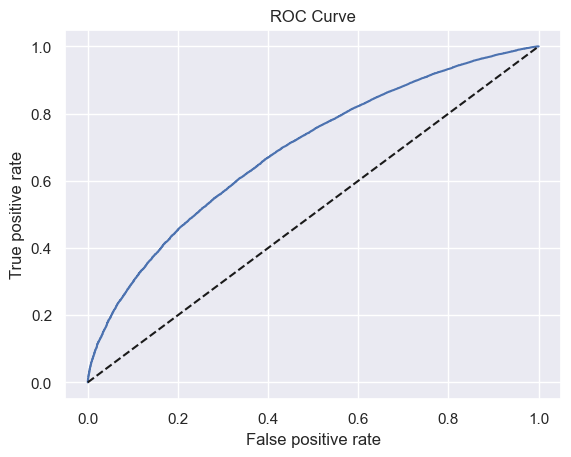

In [41]:
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = "--", color = 'k')
plt.xlabel("False positive rate")
plt.ylabel('True positive rate')
plt.title("ROC Curve")

In [42]:
# AUC
auc = roc_auc_score(test_targets_probs['Target values'], test_targets_probs['Predicted Probabilities'])
"""
Calculate the Area Under the Receiver Operating Characteristic (ROC) Curve for binary classification.

Parameters
----------
test_targets_probs : pandas.DataFrame
    A DataFrame containing two columns:
        - 'Target values': the binary true labels for the test set, where 1 denotes positive and 0 denotes negative.
        - 'Predicted Probabilities': the predicted probabilities for the positive class obtained from a binary classifier.

Returns
-------
auc : float
    The area under the ROC curve, a measure of the classifier's performance that ranges from 0 to 1, with 0.5 indicating 
    random guessing and 1 indicating perfect classification.
"""
auc

0.6895760027448378

# Gini coefficient and Kolmogorov-Smirnov indexes for model evaluation

In [43]:
# sort the dataset based on predicted probabilities
test_targets_probs = test_targets_probs.sort_values('Predicted Probabilities')
test_targets_probs.head()

,Target values,Predicted Probabilities,Threshold: best_f1
32635,0,0.454197,0
60386,0,0.468749,0
95089,0,0.472102,0
18719,1,0.491374,0
27904,1,0.504395,0


In [44]:
test_targets_probs = test_targets_probs.reset_index()
test_targets_probs

,index,Target values,Predicted Probabilities,Threshold: best_f1
0,32635,0,0.454197,0
1,60386,0,0.468749,0
2,95089,0,0.472102,0
3,18719,1,0.491374,0
4,27904,1,0.504395,0
...,...,...,...,...
115723,90515,1,0.992905,1
115724,9352,1,0.993030,1
115725,100638,1,0.993284,1
115726,58540,1,0.993572,1


In [45]:
# calculate cumulative percentages
test_targets_probs['Cumulative Population'] = test_targets_probs.index + 1
test_targets_probs['Cumulative Good'] = test_targets_probs['Target values'].cumsum()
test_targets_probs['Cumulative Bad'] = test_targets_probs['Cumulative Population'] - test_targets_probs['Target values'].cumsum()
test_targets_probs


,index,Target values,Predicted Probabilities,Threshold: best_f1,Cumulative Population,Cumulative Good,Cumulative Bad
0,32635,0,0.454197,0,1,0,1
1,60386,0,0.468749,0,2,0,2
2,95089,0,0.472102,0,3,0,3
3,18719,1,0.491374,0,4,1,3
4,27904,1,0.504395,0,5,2,3
...,...,...,...,...,...,...,...
115723,90515,1,0.992905,1,115724,103318,12406
115724,9352,1,0.993030,1,115725,103319,12406
115725,100638,1,0.993284,1,115726,103320,12406
115726,58540,1,0.993572,1,115727,103321,12406


In [46]:
test_targets_probs['Cumulative % Population'] = test_targets_probs['Cumulative Population'] / (test_targets_probs.shape[0])
test_targets_probs["Cumulative % Good"] = test_targets_probs['Cumulative Good'] / test_targets_probs['Target values'].sum()
test_targets_probs["Cumulative % Bad"] = test_targets_probs["Cumulative Bad"] / (test_targets_probs.shape[0] - test_targets_probs['Target values'].sum())



In [47]:
test_targets_probs

,index,Target values,Predicted Probabilities,Threshold: best_f1,Cumulative Population,Cumulative Good,Cumulative Bad,Cumulative % Population,Cumulative % Good,Cumulative % Bad
0,32635,0,0.454197,0,1,0,1,0.000009,0.000000,0.000081
1,60386,0,0.468749,0,2,0,2,0.000017,0.000000,0.000161
2,95089,0,0.472102,0,3,0,3,0.000026,0.000000,0.000242
3,18719,1,0.491374,0,4,1,3,0.000035,0.000010,0.000242
4,27904,1,0.504395,0,5,2,3,0.000043,0.000019,0.000242
...,...,...,...,...,...,...,...,...,...,...
115723,90515,1,0.992905,1,115724,103318,12406,0.999965,0.999961,1.000000
115724,9352,1,0.993030,1,115725,103319,12406,0.999974,0.999971,1.000000
115725,100638,1,0.993284,1,115726,103320,12406,0.999983,0.999981,1.000000
115726,58540,1,0.993572,1,115727,103321,12406,0.999991,0.999990,1.000000


Text(0.5, 1.0, 'The Gini graph')

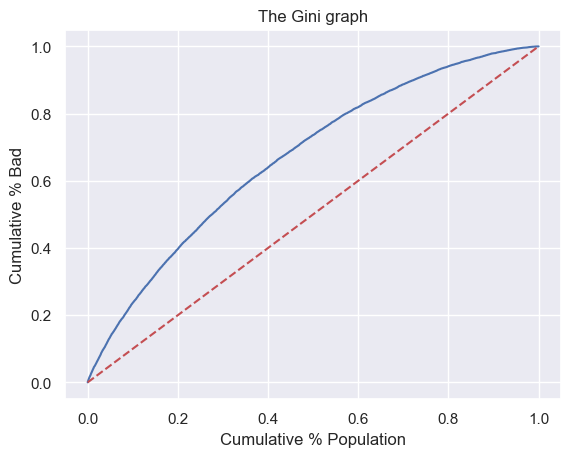

In [48]:
plt.plot(test_targets_probs["Cumulative % Population"], test_targets_probs['Cumulative % Bad'])
plt.plot(test_targets_probs["Cumulative % Population"],test_targets_probs["Cumulative % Population"], linestyle = '--', color = 'r')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('The Gini graph')

In [49]:
gini= auc * 2 - 1
gini

0.37915200548967554

Text(0.5, 1.0, 'Kolmogorov-Smirnov curves')

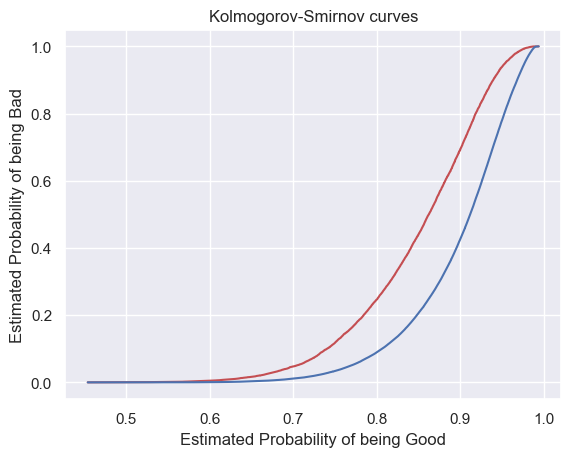

In [50]:
plt.plot(test_targets_probs["Predicted Probabilities"], test_targets_probs["Cumulative % Bad"], color = 'r')
plt.plot(test_targets_probs["Predicted Probabilities"], test_targets_probs["Cumulative % Good"], color = 'b')
plt.xlabel('Estimated Probability of being Good')
plt.ylabel("Estimated Probability of being Bad")
plt.title("Kolmogorov-Smirnov curves")

## PD Model Application with Credit Score


In [51]:
reg_table

,Feature name,Coefficients
0,Intercept,1.452074
1,grade_A,0.347395
2,grade_B,0.379170
3,grade_C,0.227795
4,grade_D,0.145752
...,...,...
101,"funded_amount_(28911.765, 29926.471]",-0.027767
102,"funded_amount_(29926.471, 30941.176]",0.045312
103,"funded_amount_(30941.176, 31955.882]",-0.028734
104,"funded_amount_(31955.882, 32970.588]",0.124958


In [52]:
ref_categories_df = pd.DataFrame(ref_categories)
ref_categories_df.columns = ['Feature name']
ref_categories_df['Coefficients'] = 0

In [53]:
scorecard = pd.concat([reg_table, ref_categories_df])
scorecard = scorecard.reset_index()
scorecard

,index,Feature name,Coefficients
0,0,Intercept,1.452074
1,1,grade_A,0.347395
2,2,grade_B,0.379170
3,3,grade_C,0.227795
4,4,grade_D,0.145752
...,...,...,...
112,6,term:60,0.000000
113,7,months_since_issued:106,0.000000
114,8,"int_rate_classes_(23.996, 26.06]",0.000000
115,9,income_120k-130k,0.000000


In [54]:

scorecard['Feature group'] = scorecard['Feature name'].str.split(':').str[0]
scorecard['Feature group'] = scorecard['Feature name'].str.split("_").str[0]

replacements = {'home':'home_ownership_status',
                'st':'state',
                "int":'interest_rate_classes',
                "verif":"verification_status",
                "funded":"funded_amount",
                "months":"months_since_issued",
                "term:36":"term",
                "term:60":"term"}

scorecard['Feature group'] = scorecard["Feature group"].replace(replacements,regex = True)
"""
Split the strings in the "Feature name" column of the `scorecard` DataFrame by the ":" character, extract the first element
from each resulting list, and assign the result to a new column named "Feature group" in the same DataFrame.

Args:
    scorecard (pandas.DataFrame): The DataFrame containing the "Feature name" column to be split and a new column to be created.

Returns:
    None. The function modifies the input DataFrame in place by adding a new column named "Feature group".
"""
scorecard = scorecard.sort_values(by="Feature group")
pd.options.display.max_rows = 200
pd.options.display.max_columns = None
scorecard


,index,Feature name,Coefficients,Feature group
0,0,Intercept,1.452074,Intercept
75,75,"funded_amount_(2529.412, 3544.118]",0.541919,funded_amount
76,76,"funded_amount_(3544.118, 4558.824]",0.422513,funded_amount
77,77,"funded_amount_(4558.824, 5573.529]",0.342782,funded_amount
78,78,"funded_amount_(5573.529, 6588.235]",0.361413,funded_amount
79,79,"funded_amount_(6588.235, 7602.941]",0.310443,funded_amount
80,80,"funded_amount_(7602.941, 8617.647]",0.250450,funded_amount
81,81,"funded_amount_(8617.647, 9632.353]",0.213092,funded_amount
82,82,"funded_amount_(9632.353, 10647.059]",0.189638,funded_amount
83,83,"funded_amount_(10647.059, 11661.765]",0.184466,funded_amount


In [55]:
# set minimum and maximum credit score 
min_score = 600
max_score = 1150


In [56]:
scorecard.groupby('Feature group')['Coefficients'].min()

Feature group
Intercept                1.452074
funded_amount           -0.088051
grade                    0.000000
home_ownership_status    0.000000
income                  -0.936422
initial                  0.000000
interest_rate_classes    0.000000
months_since_issued     -0.910116
purpose                 -0.407122
state                   -0.128317
term                    -0.052235
verification_status     -0.023401
Name: Coefficients, dtype: float64

In [57]:
scorecard.groupby('Feature group')['Coefficients'].max()

Feature group
Intercept                1.452074
funded_amount            0.733356
grade                    0.379170
home_ownership_status    0.172494
income                   0.000000
initial                  0.035868
interest_rate_classes    2.246396
months_since_issued      0.000000
purpose                  0.340202
state                    0.219710
term                     0.000000
verification_status      0.052866
Name: Coefficients, dtype: float64

In [58]:
min_coef = scorecard.groupby('Feature group')['Coefficients'].min().sum()
max_coef = scorecard.groupby('Feature group')['Coefficients'].max().sum()
print(min_coef, max_coef)

-1.093590386511709 5.632135249092454


In [59]:
scorecard['Credit score'] = scorecard['Coefficients']*((max_score-min_score)/(max_coef-min_coef))
scorecard

,index,Feature name,Coefficients,Feature group,Credit score
0,0,Intercept,1.452074,Intercept,118.744141
75,75,"funded_amount_(2529.412, 3544.118]",0.541919,funded_amount,44.315729
76,76,"funded_amount_(3544.118, 4558.824]",0.422513,funded_amount,34.551208
77,77,"funded_amount_(4558.824, 5573.529]",0.342782,funded_amount,28.031163
78,78,"funded_amount_(5573.529, 6588.235]",0.361413,funded_amount,29.554782
79,79,"funded_amount_(6588.235, 7602.941]",0.310443,funded_amount,25.386673
80,80,"funded_amount_(7602.941, 8617.647]",0.250450,funded_amount,20.480681
81,81,"funded_amount_(8617.647, 9632.353]",0.213092,funded_amount,17.425680
82,82,"funded_amount_(9632.353, 10647.059]",0.189638,funded_amount,15.507721
83,83,"funded_amount_(10647.059, 11661.765]",0.184466,funded_amount,15.084806


In [60]:
scorecard['Credit score'][0] = ((scorecard['Coefficients'][0] - min_coef)/(max_coef-min_coef)*(max_score - min_score))
scorecard['Credit score rounded'] = scorecard['Credit score'].round()
pd.options.display.max_rows=None
scorecard

C:\Users\user\AppData\Local\Temp\ipykernel_11304\3887896263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scorecard['Credit score'][0] = ((scorecard['Coefficients'][0] - min_coef)/(max_coef-min_coef)*(max_score - min_score))


,index,Feature name,Coefficients,Feature group,Credit score,Credit score rounded
0,0,Intercept,1.452074,Intercept,208.173110,208.0
75,75,"funded_amount_(2529.412, 3544.118]",0.541919,funded_amount,44.315729,44.0
76,76,"funded_amount_(3544.118, 4558.824]",0.422513,funded_amount,34.551208,35.0
77,77,"funded_amount_(4558.824, 5573.529]",0.342782,funded_amount,28.031163,28.0
78,78,"funded_amount_(5573.529, 6588.235]",0.361413,funded_amount,29.554782,30.0
79,79,"funded_amount_(6588.235, 7602.941]",0.310443,funded_amount,25.386673,25.0
80,80,"funded_amount_(7602.941, 8617.647]",0.250450,funded_amount,20.480681,20.0
81,81,"funded_amount_(8617.647, 9632.353]",0.213092,funded_amount,17.425680,17.0
82,82,"funded_amount_(9632.353, 10647.059]",0.189638,funded_amount,15.507721,16.0
83,83,"funded_amount_(10647.059, 11661.765]",0.184466,funded_amount,15.084806,15.0


In [119]:
score_min = scorecard.groupby('Feature group')['Credit score'].min().sum()
score_max = scorecard.groupby('Feature group')['Credit score'].max().sum()
print(score_min, score_max)

9.325873406851315e-15 550.0000000000001


In [120]:
# set minimum and maximum credit score 
min_score = 600
max_score = 1150
scorecard.groupby('Feature group')['Coefficients'].min()
min_coef = scorecard.groupby('Feature group')['Coefficients'].min().sum()
max_coef = scorecard.groupby('Feature group')['Coefficients'].max().sum()
scorecard['Credit score'] = (scorecard['Coefficients']*(max_score-min_score))/(max_coef-min_coef)
scorecard['Credit score'][0] = ((scorecard['Coefficients'][0] - min_coef)/(max_coef-min_coef))*(max_score - min_score)
scorecard['Credit score rounded'] = scorecard['Credit score'].round(2)  # round to two decimal places
score_min = scorecard.groupby('Feature group')['Credit score'].min().sum()
score_max = scorecard.groupby('Feature group')['Credit score'].max().sum()
print(score_min, score_max)


9.325873406851315e-15 550.0000000000001


C:\Users\user\AppData\Local\Temp\ipykernel_11304\3233791752.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scorecard['Credit score'][0] = ((scorecard['Coefficients'][0] - min_coef)/(max_coef-min_coef))*(max_score - min_score)


In [121]:
scorecard

,index,Feature name,Coefficients,Feature group,Credit score,Credit score rounded
0,0,Intercept,1.452074,Intercept,208.173110,208.17
75,75,"funded_amount_(2529.412, 3544.118]",0.541919,funded_amount,44.315729,44.32
76,76,"funded_amount_(3544.118, 4558.824]",0.422513,funded_amount,34.551208,34.55
77,77,"funded_amount_(4558.824, 5573.529]",0.342782,funded_amount,28.031163,28.03
78,78,"funded_amount_(5573.529, 6588.235]",0.361413,funded_amount,29.554782,29.55
...,...,...,...,...,...,...
41,41,term:36,-0.052235,term,-4.271531,-4.27
112,6,term:60,0.000000,term,0.000000,0.00
12,12,verif_status_Not Verified,0.052866,verification_status,4.323152,4.32
107,1,verif_status_Verified,0.000000,verification_status,0.000000,0.00


# Calculating Credit Score

In [122]:
test_vars_ref_cat = test_inputs.loc[:, ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'home_ownership_ANY',
'home_ownership_MORTGAGE',
'home_ownership_NONE',
'home_ownership_OWN',
'home_ownership_RENT',
'verif_status_Not Verified',
'verif_status_Source Verified',
'purpose_car',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_educational',
'purpose_home_improvement',
'purpose_house',
'purpose_major_purchase',
'purpose_medical',
'purpose_moving',
'purpose_renewable_energy',
'purpose_small_business',
'purpose_vacation',
'purpose_wedding',
'initial_list_status_w',
'st_group_TX',
'st_group_FL',
'st_group_NY',
'st_group_CA',
'st_group_NM_MD_NC_LA_MD',
'st_group_MI_NJ_VA',
'st_group_KY_MN_NA_IN_OH',
'st_group_RI_OR_GA_WA',
'st_group_SD_ID',
'st_group_MS_MT',
'st_group_IL_CT_CO',
'st_group_VT_SC',
'st_group_KS',
'term:36',
'months_since_issued:115',
'months_since_issued:124',
'months_since_issued:133',
'months_since_issued:142',
'months_since_issued:151',
'months_since_issued:160',
'months_since_issued:169',
'months_since_issued:178',
'months_since_issued:187',
'int_rate_classes_(5.399, 7.484]',
'int_rate_classes_(7.484, 9.548]',
'int_rate_classes_(9.548, 11.612]',
'int_rate_classes_(11.612, 13.676]',
'int_rate_classes_(13.676, 15.74]',
'int_rate_classes_(15.74, 17.804]',
'int_rate_classes_(17.804, 19.868]',
'int_rate_classes_(19.868, 21.932]',
'int_rate_classes_(21.932, 23.996]',
'income_<0k',
'income_0k-10k',
'income_10k-20k',
'income_20k-30k',
'income_30k-40k',
'income_40k-50k',
'income_50k-60k',
'income_60k-70k',
'income_70k-80k',
'income_80k-90k',
'income_90k-100k',
'income_100k-110k',
'income_110k-120k',
'funded_amount_(465.5, 1514.706]',
'funded_amount_(1514.706, 2529.412]',
'funded_amount_(2529.412, 3544.118]',
'funded_amount_(3544.118, 4558.824]',
'funded_amount_(4558.824, 5573.529]',
'funded_amount_(5573.529, 6588.235]',
'funded_amount_(6588.235, 7602.941]',
'funded_amount_(7602.941, 8617.647]',
'funded_amount_(8617.647, 9632.353]',
'funded_amount_(9632.353, 10647.059]',
'funded_amount_(10647.059, 11661.765]',
'funded_amount_(11661.765, 12676.471]',
'funded_amount_(12676.471, 13691.176]',
'funded_amount_(13691.176, 14705.882]',
'funded_amount_(14705.882, 15720.588]',
'funded_amount_(15720.588, 16735.294]',
'funded_amount_(16735.294, 17750.0]',
'funded_amount_(17750.0, 18764.706]',
'funded_amount_(18764.706, 19779.412]',
'funded_amount_(19779.412, 20794.118]',
'funded_amount_(20794.118, 21808.824]',
'funded_amount_(21808.824, 22823.529]',
'funded_amount_(22823.529, 23838.235]',
'funded_amount_(23838.235, 24852.941]',
'funded_amount_(24852.941, 25867.647]',
'funded_amount_(25867.647, 26882.353]',
'funded_amount_(26882.353, 27897.059]',
'funded_amount_(27897.059, 28911.765]',
'funded_amount_(28911.765, 29926.471]',
'funded_amount_(29926.471, 30941.176]',
'funded_amount_(30941.176, 31955.882]',
'funded_amount_(31955.882, 32970.588]',
'funded_amount_(32970.588, 33985.294]',
'grade_G',
'verif_status_Verified',
'purpose_other',
'home_own_none_other_any_combined',
'initial_list_status_f',
'st_group_OK_TN_AZ_DE_AR_UT',
'term:60',
'months_since_issued:106',
'int_rate_classes_(23.996, 26.06]',
'income_120k-130k',
'funded_amount_(33985.294, 35000.0]']]


In [123]:
test_x = test_vars_ref_cat.sort_index(axis=1)
test_x.insert(0, "Intercept", 1)
pd.options.display.max_rows=50
test_x

,Intercept,"funded_amount_(10647.059, 11661.765]","funded_amount_(11661.765, 12676.471]","funded_amount_(12676.471, 13691.176]","funded_amount_(13691.176, 14705.882]","funded_amount_(14705.882, 15720.588]","funded_amount_(1514.706, 2529.412]","funded_amount_(15720.588, 16735.294]","funded_amount_(16735.294, 17750.0]","funded_amount_(17750.0, 18764.706]","funded_amount_(18764.706, 19779.412]","funded_amount_(19779.412, 20794.118]","funded_amount_(20794.118, 21808.824]","funded_amount_(21808.824, 22823.529]","funded_amount_(22823.529, 23838.235]","funded_amount_(23838.235, 24852.941]","funded_amount_(24852.941, 25867.647]","funded_amount_(2529.412, 3544.118]","funded_amount_(25867.647, 26882.353]","funded_amount_(26882.353, 27897.059]","funded_amount_(27897.059, 28911.765]","funded_amount_(28911.765, 29926.471]","funded_amount_(29926.471, 30941.176]","funded_amount_(30941.176, 31955.882]","funded_amount_(31955.882, 32970.588]","funded_amount_(32970.588, 33985.294]","funded_amount_(33985.294, 35000.0]","funded_amount_(3544.118, 4558.824]","funded_amount_(4558.824, 5573.529]","funded_amount_(465.5, 1514.706]","funded_amount_(5573.529, 6588.235]","funded_amount_(6588.235, 7602.941]","funded_amount_(7602.941, 8617.647]","funded_amount_(8617.647, 9632.353]","funded_amount_(9632.353, 10647.059]",grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_own_none_other_any_combined,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,income_0k-10k,income_100k-110k,income_10k-20k,income_110k-120k,income_120k-130k,income_20k-30k,income_30k-40k,income_40k-50k,income_50k-60k,income_60k-70k,income_70k-80k,income_80k-90k,income_90k-100k,income_<0k,initial_list_status_f,initial_list_status_w,"int_rate_classes_(11.612, 13.676]","int_rate_classes_(13.676, 15.74]","int_rate_classes_(15.74, 17.804]","int_rate_classes_(17.804, 19.868]","int_rate_classes_(19.868, 21.932]","int_rate_classes_(21.932, 23.996]","int_rate_classes_(23.996, 26.06]","int_rate_classes_(5.399, 7.484]","int_rate_classes_(7.484, 9.548]","int_rate_classes_(9.548, 11.612]",months_since_issued:106,months_since_issued:115,months_since_issued:124,months_since_issued:133,months_since_issued:142,months_since_issued:151,months_since_issued:160,months_since_issued:169,months_since_issued:178,months_since_issued:187,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,st_group_CA,st_group_FL,st_group_IL_CT_CO,st_group_KS,st_group_KY_MN_NA_IN_OH,st_group_MI_NJ_VA,st_group_MS_MT,st_group_NM_MD_NC_LA_MD,st_group_NY,st_group_OK_TN_AZ_DE_AR_UT,st_group_RI_OR_GA_WA,st_group_SD_ID,st_group_TX,st_group_VT_SC,term:36,term:60,verif_status_Not Verified,verif_status_Source Verified,verif_status_Verified
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [124]:
test_betas = scorecard.sort_values("Feature name").reset_index(drop=True)
test_betas = test_betas['Credit score rounded']
test_betas = test_betas.values.reshape(117,1)

In [125]:
if test_x.shape[1] == test_betas.shape[0]:
    print("Matrices are aligned for multiplication.")
else:
    print("Matrices are not aligned for multiplication.")

Matrices are aligned for multiplication.


In [126]:
credit_score = test_x.dot(test_betas)
#credit_score = credit_score + 300
credit_score

,0
0,230.35
1,284.05
2,267.22
3,219.60
4,364.92
...,...
115723,308.36
115724,265.89
115725,243.86
115726,319.93


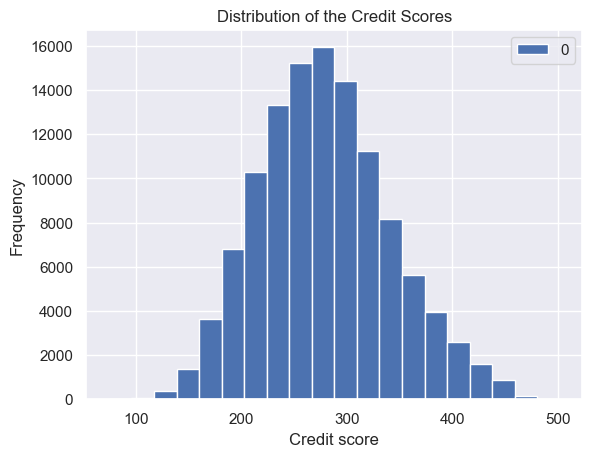

In [127]:
credit_score.plot(kind='hist', bins=20)
plt.xlabel("Credit score")
plt.ylabel("Frequency")
plt.title("Distribution of the Credit Scores")
plt.show()

In [128]:
max_credit_score = max(credit_score[0])
min_credit_score = min(credit_score[0])
print(min_credit_score, max_credit_score)

74.41000000000001 502.15


In [117]:
credit_score['reverse coefficients'] = ((credit_score[0]-min_credit_score)/(max_credit_score - min_credit_score))*(max_coef-min_coef) + min_coef

In [118]:
credit_score

,0,reverse coefficients
0,230.35,1.358389
1,284.05,2.202760
2,267.22,1.938128
3,219.60,1.189357
4,364.92,3.474349
...,...,...
115723,308.36,2.585008
115724,265.89,1.917215
115725,243.86,1.570818
115726,319.93,2.766933


## Credit approval decision

In [129]:
fpr, tpr, thresholds = roc_curve(test_targets_probs['Target values'], test_targets_probs['Predicted Probabilities'])


In [137]:
decision_table = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
decision_table.columns = ['Thresholds', 'False Positive Rate', 'True Positive Rate']
decision_table

,Thresholds,False Positive Rate,True Positive Rate
0,1.993612,0.000000,0.000000
1,0.993612,0.000000,0.000010
2,0.991560,0.000000,0.000135
3,0.991560,0.000081,0.000135
4,0.989600,0.000081,0.001152
...,...,...,...
27614,0.526177,0.999516,0.999971
27615,0.516921,0.999516,0.999981
27616,0.510137,0.999758,0.999981
27617,0.491374,0.999758,1.000000
